# Task 4.10 Instacart Analysis
## Table of Contents
#### Setting up the Environment
#### Regional Segmentation of Data
#### Customer Activity Frequency
#### Customer Profiles by Age, Income, Household and Department
#### Aggregated Customer Profiles  by Age, Income, Household and Department
#### Regional Customer Profiles by Age, Income and Household
#### Departmental Customer Profiles by Age, Income and Household

## Setting Up the Environment

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Create a path
path = r'C:\Users\manny\Documents\Instacart Basket Analysis 05-01-2023'

In [4]:
#import dataframe 
df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merge.pkl'))

## Create a regional segmentation of the data.

In [6]:
#For-loop function w/ if statements to create regions.

region=[]

for value in df['State']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value =='New Jersey'):
        region.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        region.append('Midwest')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        region.append('West')
    else:
        region.append('South')

In [5]:
#Create a Region column

df['region'] = region

In [6]:
#Value Count of Region
df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### Spending habits per region

In [7]:
#Cross tab of region and spending flag
df_region_spend = pd.crosstab(df['region'],df['spending_flag'],dropna = False)
df_region_spend

spending_flag,high_spender,low_spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


Observation: There are significantly more low spenders across regions than high spenders.

## Customer Activity Frequency

###  Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [8]:
#Create a order frequency flag using loc function

df.loc[df['max_order'] < 5, 'low_order_flag'] = 'Low order customer'
df.loc[df['max_order'] >= 5, 'low_order_flag'] = 'High order customer'

In [9]:
#Check for value counts for  order flag
df['low_order_flag'].value_counts(dropna = False)

High order customer    30964564
Low order customer      1440295
Name: low_order_flag, dtype: int64

In [10]:
#Create a high order subset
df_high_ord_cust=df[df['low_order_flag']=='High order customer']

In [ ]:
# Export data
df_high_ord_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_high.pkl'))

## Customer profiles

#### Age Profiles

In [12]:
#Checking for minimum and maximum age
df['age'].min()

18

In [13]:
df['age'].max()

81

In [8]:
# Grouping ages and creating age group column
df.loc[df['age'] <= 40, 'age_group'] = '18-40 years old'
df.loc[(df['age'] > 40) & (df['age'] <= 65), 'age_group'] = '41-65 years old'
df.loc[df['age'] > 65, 'age_group'] = '65+ years old'

In [15]:
#check value counts for age
df['age_group'].value_counts(dropna= False)

41-65 years old    12646712
18-40 years old    11670046
65+ years old       8088101
Name: age_group, dtype: int64

Text(0, 0.5, 'Frequency')

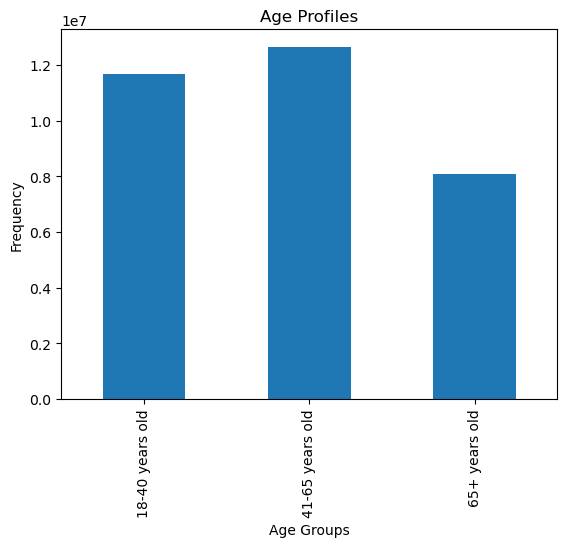

In [9]:
#Bar chart for age
bar_age=df['age_group'].value_counts().sort_index().plot.bar()

plt.title("Age Profiles")
plt.xlabel("Age Groups")
plt.ylabel("Frequency")

The minimum age is 18 years old and the maximum age is 81 years old.
The ages arebroken down into 3 separate groups: 18-40 years old, 41-65 years old and 65 and above years old. The bar graph shows that most of the customers are between the ages of 41-65 years old.

In [10]:
#Export bar chart for age 
bar_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age.png'))

#### Income Profiles

In [19]:
# Checking for income percentiles 
df['income'].quantile(0.75)

127912.0

Looking at the different quartiles,
25 percentile: 67,004,
50 percentile: 96,618,
75 percentile: 127,912

Thus, I have decided to group incomes as 65k below, 65k-125K and 125K above

In [11]:
#Grouping income and creating an income group 
df.loc[df['income'] <= 65000, 'income_group'] = '65K and below'
df.loc[(df['income'] > 65000) & (df['income'] < 125000), 'income_group'] = '65K-125K'
df.loc[df['income'] >= 125000, 'income_group'] = '125K and above'

In [21]:
#check values for income group
df['income_group'].value_counts(dropna= False)

65K-125K          16252709
125K and above     8630957
65K and below      7521193
Name: income_group, dtype: int64

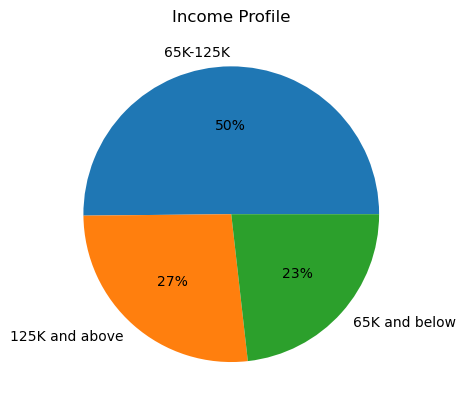

In [22]:
#Plotting the pie chart
pie_income=df['income_group'].value_counts().plot.pie(title ='Income Profile', label = '', autopct=('%1.f%%'))

 Majority of the shoppers earn from 65-125K which is half the customer base.

In [ ]:
#Export bar chart for age 
pie_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_income.png'))

#### Number of dependants Profiles

In [23]:
#check values for dependants
df['total_dependants'].value_counts(dropna= False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: total_dependants, dtype: int64

In [25]:
#Group and create household status

df.loc[df['total_dependants'] == 0, 'household_status'] = 'single adult'
df.loc[df['total_dependants'] == 1, 'household_status'] = 'household of 2'
df.loc[df['total_dependants'] == 2, 'household_status'] = 'household of 3'
df.loc[df['total_dependants'] == 3, 'household_status'] = 'household of 4'

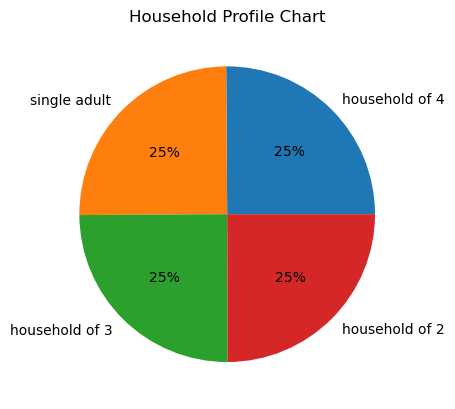

In [28]:
#Family status pie chart
pie_household = df['household_status'].value_counts().plot.pie(title = 'Household Profile Chart', label = '', autopct = ('%1.f%%'))

Using the number of dependants per customer, the data was divided into different household numbers. Those with 0 dependants are categorized as 'single adult' household and those with 1 dependents are categorized as 'household of 2.' There is an even split between the different categories with each totaling to 25%.

In [29]:
#Export pie chart for household
pie_household.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_household.png'))

#### Department ID Profile

In [15]:
#import department dataframe
df_dept=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [31]:
#Check Output
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [18]:
#Rename unnamed column
df_dept.rename(columns = {'Unnamed: 0': 'department_id'}, inplace= True)
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [19]:
#Merge df_dept with df to create df_2

df_2=df.merge(df_dept, on = 'department_id')

In [41]:
#Check value count of department
df_2['department'].value_counts(dropna= False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [42]:
#Cross tab of department and household
df_dept_house = pd.crosstab(df_2['department'],df_2['household_status'],dropna = False)
df_dept_house

household_status,household of 2,household of 3,household of 4,single adult
department,,,,
alcohol,37964,36878,39736,39118
babies,103239,107975,106094,106494
bakery,292993,292171,292859,294405
beverages,668226,675392,670063,674442
breakfast,177209,175781,175466,174577
bulk,8848,8762,8685,8278
canned goods,267129,266477,269614,264838
dairy eggs,1353489,1343988,1351908,1349362
deli,259567,262007,264530,265145


## Aggregating Customer Profiles

In [44]:
#Age profile
df_2.groupby('age_group').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                  mean   max  min       mean      max  min
age_group                                                                 
18-40 years old              11.109790  30.0  0.0  12.085039  99999.0  1.0
41-65 years old              11.113621  30.0  0.0  11.974159  99999.0  1.0
65+ years old                11.080922  30.0  0.0  11.838480  99999.0  1.0

In [45]:
#Income group
df_2.groupby('income_group').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                 mean   max  min       mean      max  min
income_group                                                             
125K and above              11.024072  30.0  0.0  21.348529  99999.0  1.0
65K and below               11.340582  30.0  0.0   7.240757  14900.0  1.0
65K-125K                    11.037770  30.0  0.0   9.198476  99999.0  1.0

In [46]:
#Household status
df_2.groupby('household_status').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                   mean   max  min       mean      max  min
household_status                                                           
household of 2                11.100028  30.0  0.0  11.629316  99999.0  1.0
household of 3                11.125757  30.0  0.0  12.369543  99999.0  1.0
household of 4                11.109714  30.0  0.0  11.793264  99999.0  1.0
single adult                  11.080805  30.0  0.0  12.129243  99999.0  1.0

In [48]:
#Department
df_2.groupby('department').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                  mean   max  min       mean      max  min
department                                                                
alcohol                      10.340887  30.0  0.0   8.143701     15.0  1.0
babies                       10.004465  30.0  0.0   7.638380     15.0  1.0
bakery                       11.097613  30.0  0.0   7.853809     15.0  1.0
beverages                    11.053389  30.0  0.0   7.680502     15.0  1.0
breakfast                    11.296101  30.0  0.0   8.028963     14.9  1.0
bulk                         10.104230  30.0  0.0   8.348960     14.1  1.4
canned goods                 11.656079  30.0  0.0   7.539976     15.0  1.0
dairy eggs                   10.986054  30.0  0.0  33.479533  99999.0  1.0
deli                         11.345655  30.0  0.0   7.778701     15.0  1.0
dry goods pasta              11.774450  30.0  0.0   7.350283     15.0  1.0
frozen                       11.730829  30.0  0.0   7.736553     15.0  1.0
household                    11.996490  30.0  0.0   7.384058     15.0  1.0
international                11.291251  30.0  0.0   7.682264     15.0  1.0
meat seafood                 11.432021  30.0  0.0  16.294443     25.0  8.0
missing                      10.218559  30.0  0.0   8.660716     15.0  1.0
other                        10.952867  30.0  0.0   6.990934     15.0  1.1
pantry                       11.163256  30.0  0.0   8.009443     20.0  1.0
personal care                11.593145  30.0  0.0   7.996769     15.0  1.0
pets                         11.867322  30.0  0.0   7.889070     15.0  1.0
produce                      10.856212  30.0  0.0   7.981708     15.0  1.0
snacks                       10.947879  30.0  0.0   4.275437      7.0  1.6

## Customer Profiles by Regions

#### Age and Region

In [20]:
df_age_region = pd.crosstab(df_2['age_group'],df_2['region'],dropna = False)
df_age_region

KeyError: 'region'

In [12]:
age_region_bar =df_age_region.plot.bar(rot=0)

plt.title("Age Group by Region")

NameError: name 'df_age_region' is not defined

In [52]:
#Export age_region_bar chart
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

#### Income and Region

In [53]:
df_income_region = pd.crosstab(df_2['income_group'],df_2['region'],dropna = False)
df_income_region

region,Midwest,Northeast,South,West
income_group,,,,
125K and above,2053696,1539284,2836363,2201614
65K and below,1737985,1317307,2532055,1933846
65K-125K,3805644,2866145,5423467,4157453


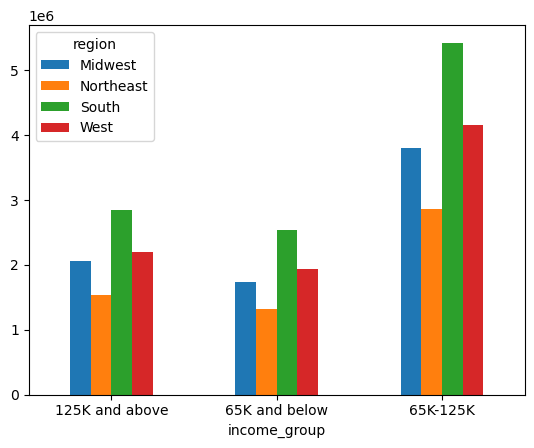

In [57]:
incomr_region_bar =df_income_region.plot.bar(rot=0)

In [59]:
#Export income_region_bar chart
incomr_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

#### Household and Region

In [58]:
df_household_region = pd.crosstab(df_2['household_status'],df_2['region'],dropna = False)
df_household_region

region,Midwest,Northeast,South,West
household_status,,,,
household of 2,1926472,1442253,2659730,2052649
household of 3,1890986,1417102,2723958,2059097
household of 4,1874667,1445080,2706538,2108824
single adult,1905200,1418301,2701659,2072343


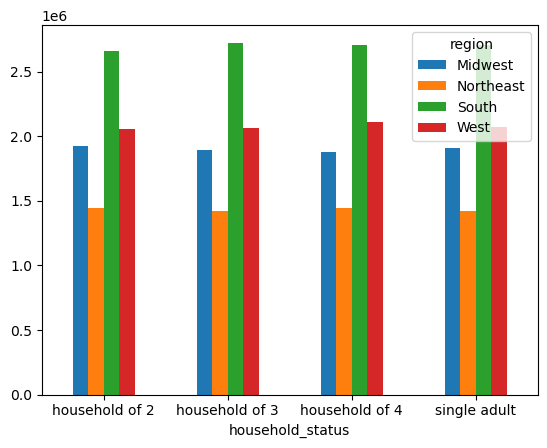

In [60]:
#Visualization
household_region_bar =df_household_region.plot.bar(rot=0)

In [61]:
#Export age_region_bar chart
household_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_region_bar.png'))

#### Department and Region

In [68]:
df_dept_region = pd.crosstab(df_2['department_id'],df_2['region'],dropna = False)
df_dept_region

region,Midwest,Northeast,South,West
department_id,,,,
1,524096,390918,747900,571829
2,8420,6585,12212,9074
3,273869,208599,388815,301145
4,2227937,1665839,3160551,2424964
5,36186,26542,51624,39344
6,63736,46891,89142,69484
7,625574,483418,898940,680191
8,22355,18601,31269,25491
9,203769,151816,287444,223598


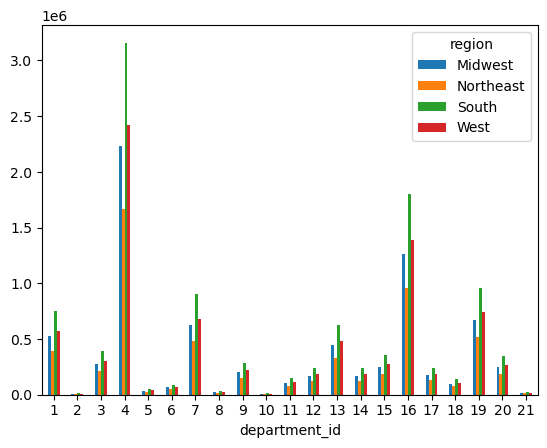

In [69]:
#Visualization
dept_region_bar =df_dept_region.plot.bar(rot=0)

In [70]:
#Export household_region_bar chart
dept_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_region_bar.png'))

### Customer Profile by Department

In [77]:
df_age_dept = pd.crosstab(df_2['age_group'],df_2['department'],dropna = False)
df_age_dept

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
18-40 years old,57243,152763,421442,957256,253803,12508,386223,1952617,378298,312430,...,264510,97977,253723,25203,13218,672494,160350,35248,3417016,1044638
41-65 years old,59505,167813,459763,1055598,275661,13456,415814,2100341,410810,337785,...,288118,104661,275946,26922,14275,734459,176621,37591,3693961,1124272
65+ years old,36948,103226,291223,675269,173569,8609,266021,1345789,262141,216412,...,186038,66615,179258,17020,8798,468416,110601,24877,2368314,718640


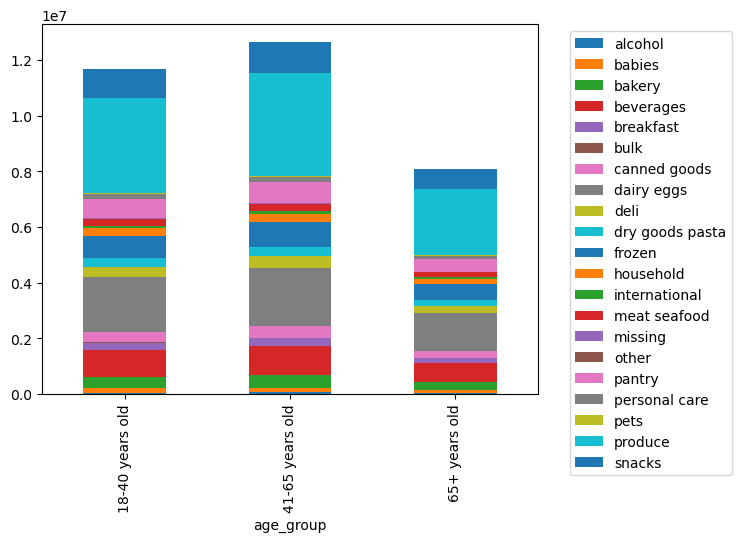

In [82]:
# Creating a stacked bar plot of the new crosstab

bar_age_dept=df_age_dept.plot.bar(stacked = True)


bar_age_dept.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [83]:
bar_age_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_age_bar.png'))

#### Income and Department

In [84]:
df_income_dept = pd.crosstab(df_2['income_group'],df_2['department'],dropna = False)
df_income_dept

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
125K and above,45098,117191,322510,687581,181615,8318,297924,1460490,279596,238992,...,197875,73434,204838,18483,9704,512307,119069,27600,2555543,667085
65K and below,37371,77197,255822,731104,184191,9133,215224,1182757,240958,174224,...,181679,56009,119756,15727,8441,406275,106259,20495,2040258,959070
65K-125K,71227,229414,594096,1269438,337227,17122,554910,2755500,530695,453411,...,359112,139810,384333,34935,18146,956787,222244,49621,4883490,1261395


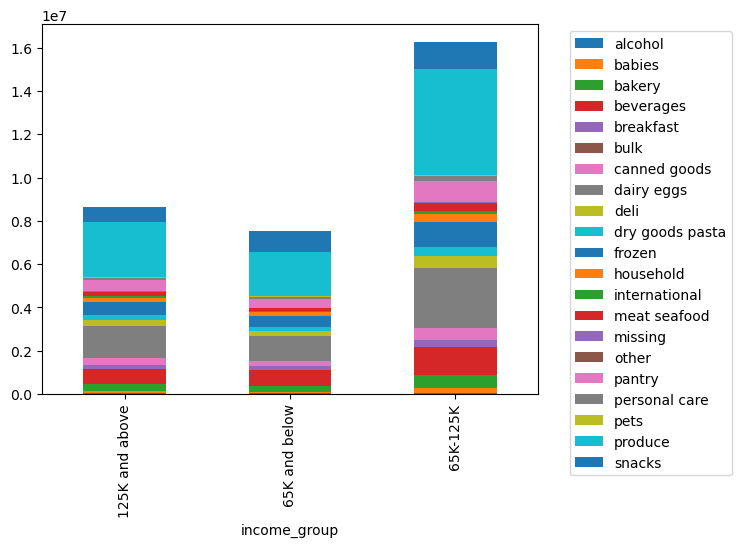

In [85]:
# Creating a stacked bar plot of the new crosstab

bar_income_dept=df_income_dept.plot.bar(stacked = True)


bar_income_dept.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [86]:
#Save viz
bar_income_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_income_bar.png'))

#### Household status and department

In [88]:
df_household_dept = pd.crosstab(df_2['household_status'],df_2['department'],dropna = False)
df_household_dept

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
household_status,,,,,,,,,,,,,,,,,,,,,
household of 2,37964,103239,292993,668226,177209,8848,267129,1353489,259567,216060,...,185344,68008,177823,17132,9186,469350,111722,25035,2359186,718938
household of 3,36878,107975,292171,675392,175781,8762,266477,1343988,262007,215579,...,186308,66684,176828,17475,9070,469658,111659,23749,2356794,726008
household of 4,39736,106094,292859,670063,175466,8685,269614,1351908,264530,219726,...,186241,66848,180192,17450,8860,469604,112185,24349,2387866,721806
single adult,39118,106494,294405,674442,174577,8278,264838,1349362,265145,215262,...,180773,67713,174084,17088,9175,466757,112006,24583,2375445,720798


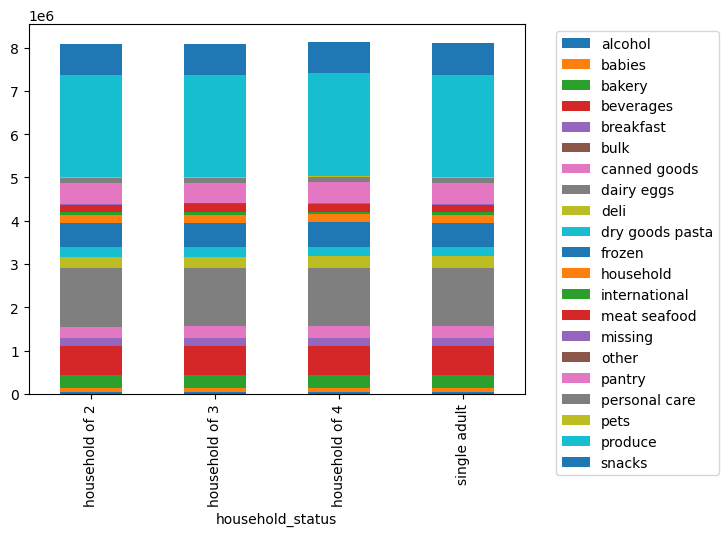

In [90]:
# Creating a stacked bar plot of the new crosstab

bar_household_dept=df_household_dept.plot.bar(stacked = True)


bar_household_dept.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [91]:
#Save viz
bar_household_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_household_bar.png'))